In [1]:
import pandas as pd
import seaborn as sns
from glob import glob
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
dfs = []
dfs_unfiltered = []
known_systems = set()
for filename in sorted(glob("data/green500_top_*.xlsx")):
    print(f"reading {filename}")
    if filename == "data/green500_top_202006.xlsx":
        print("skipping, no Power Quality Level")
        continue
    d = datetime.strptime(filename, "data/green500_top_%Y%m.xlsx")
    df1 = pd.read_excel(filename)
    df1 = df1.rename(columns={
        "How?": "Power Source",
        "how": "Power Source",
    })
    if not "System ID" in df1:
        print("skipping, no System ID")
        continue
    df1["list"] = d
    dfs_unfiltered.append(df1.copy())
    df1 = df1[~df1['System ID'].isin(known_systems)]
    known_systems.update(df1["System ID"])
    # try:
    #     df1["Power Quality Level"] = df1["Power Quality Level"].where(lambda x: x != 0).dropna()
    # except KeyError:
    #     pass
    dfs.append(df1)
df = pd.concat(dfs)
dfs_unfiltered = pd.concat(dfs_unfiltered)

reading data/green500_top_201311.xlsx
skipping, no System ID
reading data/green500_top_201406.xlsx
skipping, no System ID
reading data/green500_top_201411.xlsx


/home/tilsche/.cache/pypoetry/virtualenvs/green500-analysis-AyUEgljv-py3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


skipping, no System ID
reading data/green500_top_201506.xlsx
skipping, no System ID
reading data/green500_top_201511.xlsx
skipping, no System ID
reading data/green500_top_201606.xlsx
skipping, no System ID
reading data/green500_top_201611.xlsx
skipping, no System ID
reading data/green500_top_201706.xlsx
skipping, no System ID
reading data/green500_top_201711.xlsx
reading data/green500_top_201806.xlsx
reading data/green500_top_201811.xlsx
reading data/green500_top_201906.xlsx
reading data/green500_top_201911.xlsx
reading data/green500_top_202006.xlsx
skipping, no Power Quality Level
reading data/green500_top_202011.xlsx
reading data/green500_top_202106.xlsx
reading data/green500_top_202111.xlsx
reading data/green500_top_202206.xlsx
reading data/green500_top_202211.xlsx
reading data/green500_top_202306.xlsx
reading data/green500_top_202311.xlsx
reading data/green500_top_202406.xlsx
reading data/green500_top_202411.xlsx


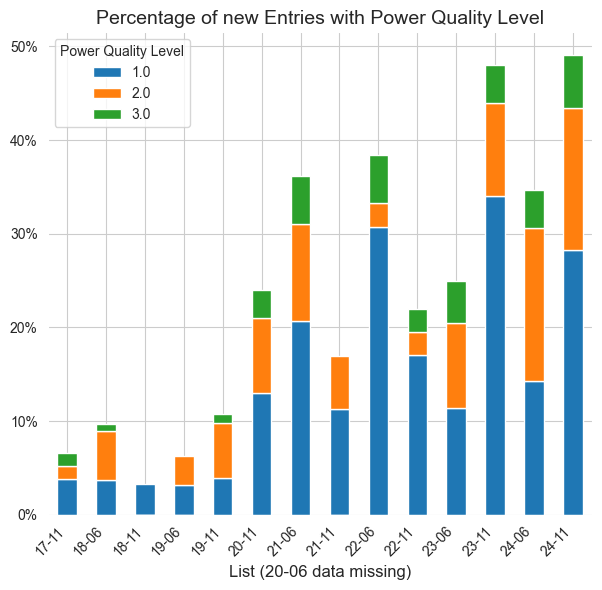

In [3]:
dff = df.copy()
# Replace NaNs with a placeholder and ensure the column is of string type
dff['Power Quality Level'] = dff['Power Quality Level'].fillna('Unknown').astype(str)

# Creating a pivot table with counts
count_pivot = dff.pivot_table(index=dff['list'].dt.strftime('%y-%m'), 
                              columns='Power Quality Level', 
                              aggfunc='size', 
                              fill_value=0)

# Normalizing the counts by the total number of entries for each 'list' and converting to percentage
normalized_pivot = count_pivot.div(count_pivot.sum(axis=1), axis=0) * 100

# Drop the placeholder category before plotting
normalized_pivot = normalized_pivot.drop(columns=['Unknown'])

# Plotting the normalized stacked bar chart
ax = normalized_pivot.plot(kind='bar', stacked=True, figsize=(6, 6))

# Customizing the plot for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)  # Adjusting font size for x-ticks
plt.yticks(fontsize=10)  # Adjusting font size for y-ticks
plt.xlabel('List (20-06 data missing)', fontsize=12)
plt.title('Percentage of new Entries with Power Quality Level', fontsize=14)
plt.tight_layout()

# Formatting the y-axis labels to show percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x)))

# Make background transparent
ax.set_facecolor('none')
plt.gca().patch.set_alpha(0)

# Change color of all spines (borders of the plot)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Change grid color to white
# ax.grid(color='white')

# Save the figure
plt.savefig('green500-level.png', dpi=300, transparent=True)  # High resolution for clarity

# Show the plot
plt.show()

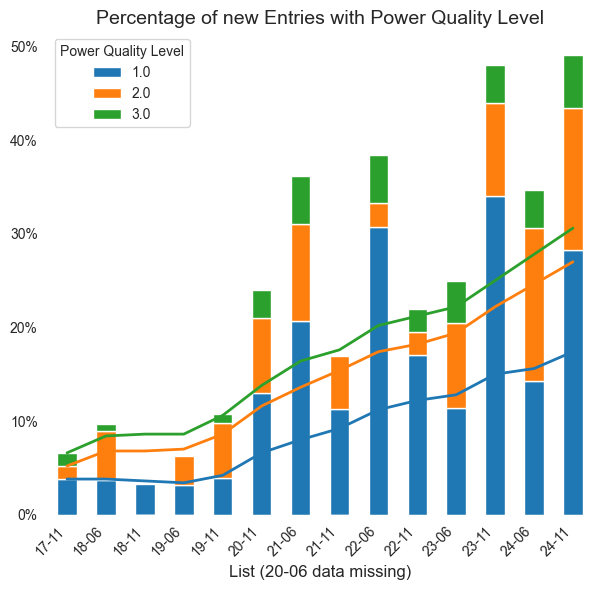

In [4]:
dff = df.copy()
dff_uf = dfs_unfiltered.copy()

# Replace NaNs with a placeholder and ensure the column is of string type
dff['Power Quality Level'] = dff['Power Quality Level'].fillna('Unknown').astype(str)
dff_uf['Power Quality Level'] = dff_uf['Power Quality Level'].fillna('Unknown').astype(str)

# Creating a pivot table with counts
count_pivot = dff.pivot_table(index=dff['list'].dt.strftime('%y-%m'), 
                              columns='Power Quality Level', 
                              aggfunc='size', 
                              fill_value=0)
count_pivot_uf = dff_uf.pivot_table(index=dff_uf['list'].dt.strftime('%y-%m'), 
                              columns='Power Quality Level', 
                              aggfunc='size', 
                              fill_value=0)

# Normalizing the counts by the total number of entries for each 'list' and converting to percentage
normalized_pivot = count_pivot.div(count_pivot.sum(axis=1), axis=0) * 100
normalized_pivot_uf = count_pivot_uf.div(count_pivot_uf.sum(axis=1), axis=0) * 100

# Drop the placeholder category before plotting
normalized_pivot = normalized_pivot.drop(columns=['Unknown'])
normalized_pivot_uf = normalized_pivot_uf.drop(columns=['Unknown'])

# Plotting the normalized stacked bar chart
ax = normalized_pivot.plot(kind='bar', stacked=True, figsize=(6, 6))

# Calculate the cumulative sums for the second DataFrame across Power Quality Levels
cumulative_sums = normalized_pivot_uf.cumsum(axis=1)
cumulative_sums.plot(kind='line', ax=ax, linewidth=2, legend=False)

    
# Customizing the plot for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)  # Adjusting font size for x-ticks
plt.yticks(fontsize=10)  # Adjusting font size for y-ticks
plt.xlabel('List (20-06 data missing)', fontsize=12)
plt.title('Percentage of new Entries with Power Quality Level', fontsize=14)
plt.tight_layout()

# Formatting the y-axis labels to show percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x)))

# Make background transparent
ax.set_facecolor('none')
plt.gca().patch.set_alpha(0)

# Change color of all spines (borders of the plot)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Change grid color to white
ax.grid(color='white')

# Save the figure
plt.savefig('green500-level.png', dpi=300, transparent=True)  # High resolution for clarity

# Show the plot
plt.show()

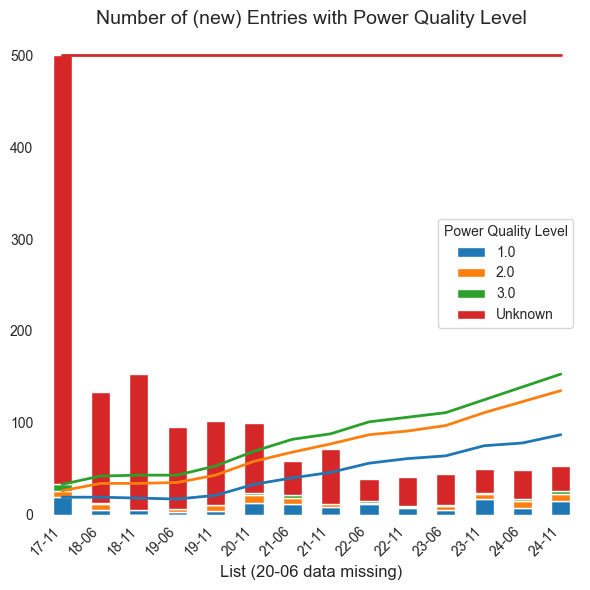

In [5]:
dff = df.copy()
dff_uf = dfs_unfiltered.copy()

# Replace NaNs with a placeholder and ensure the column is of string type
dff['Power Quality Level'] = dff['Power Quality Level'].fillna('Unknown').astype(str)
dff_uf['Power Quality Level'] = dff_uf['Power Quality Level'].fillna('Unknown').astype(str)

# Creating a pivot table with counts
count_pivot = dff.pivot_table(index=dff['list'].dt.strftime('%y-%m'), 
                              columns='Power Quality Level', 
                              aggfunc='size', 
                              fill_value=0)
count_pivot_uf = dff_uf.pivot_table(index=dff_uf['list'].dt.strftime('%y-%m'), 
                              columns='Power Quality Level', 
                              aggfunc='size', 
                              fill_value=0)

# Drop the placeholder category before plotting
normalized_pivot = count_pivot#.drop(columns=['Unknown'])
normalized_pivot_uf = count_pivot_uf#.drop(columns=['Unknown'])

# Plotting the normalized stacked bar chart
ax = normalized_pivot.plot(kind='bar', stacked=True, figsize=(6, 6))

# Calculate the cumulative sums for the second DataFrame across Power Quality Levels
cumulative_sums = normalized_pivot_uf.cumsum(axis=1)
cumulative_sums.plot(kind='line', ax=ax, linewidth=2, legend=False)

    
# Customizing the plot for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)  # Adjusting font size for x-ticks
plt.yticks(fontsize=10)  # Adjusting font size for y-ticks
plt.xlabel('List (20-06 data missing)', fontsize=12)
plt.title('Number of (new) Entries with Power Quality Level', fontsize=14)
plt.tight_layout()

# Formatting the y-axis labels to show percentages
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x)))

# Make background transparent
ax.set_facecolor('none')
plt.gca().patch.set_alpha(0)

# Change color of all spines (borders of the plot)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Change grid color to white
ax.grid(color='white')

# Save the figure
plt.savefig('green500-level-absolute.png', dpi=300, transparent=True)  # High resolution for clarity

# Show the plot
plt.show()

In [6]:
# create a new column on dfs_unfiltered that has true if a power value is given
dfs_unfiltered['Power Given'] = dfs_unfiltered['Power (kW)'].notna()
#combine with Power Quality Level by concatenating the strings
dfs_unfiltered['PQL'] = dfs_unfiltered['Power Quality Level'].astype(str) + " " + dfs_unfiltered['Power Given'].astype(str)
df["PQL"] = df["Power Quality Level"].astype(str) + " " + df["Power (kW)"].notna().astype(str)

In [7]:
dfs_unfiltered[dfs_unfiltered.list == "2024-06-01"]['PQL'].value_counts()

PQL
nan False    306
1.0 True      78
nan True      55
2.0 True      45
3.0 True      16
Name: count, dtype: int64

In [8]:
dfs_unfiltered[dfs_unfiltered.list == "2024-11-01"]['PQL'].value_counts()

PQL
nan False    301
1.0 True      87
2.0 True      48
nan True      46
3.0 True      18
Name: count, dtype: int64

In [9]:
mm = {
    "nan False": "No Power Given",
    "nan True": "No Quality Level",
    "1.0 True": "Level 1",
    "2.0 True": "Level 2",
    "3.0 True": "Level 3",
}
dfs_unfiltered["Power Measurement"] = dfs_unfiltered["PQL"].map(mm)
df["Power Measurement"] = df["PQL"].map(mm)

In [10]:
dfs_unfiltered[dfs_unfiltered.list == "2024-06-01"]['Power Measurement'].value_counts()

Power Measurement
No Power Given      306
Level 1              78
No Quality Level     55
Level 2              45
Level 3              16
Name: count, dtype: int64

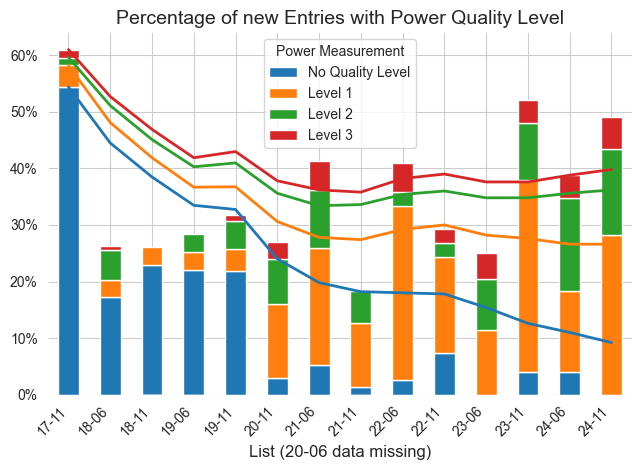

In [11]:
dff = df.copy()
dff_uf = dfs_unfiltered.copy()

column_order = ["No Quality Level", "Level 1", "Level 2", "Level 3"]
column_order_ext = column_order + ["No Power Given"]
# Replace NaNs with a placeholder and ensure the column is of string type
# Creating a pivot table with counts
count_pivot = dff.pivot_table(index=dff['list'].dt.strftime('%y-%m'), 
                              columns='Power Measurement', 
                              aggfunc='size', 
                              fill_value=0)
count_pivot_uf = dff_uf.pivot_table(index=dff_uf['list'].dt.strftime('%y-%m'), 
                              columns='Power Measurement', 
                              aggfunc='size', 
                              fill_value=0)

count_pivot = count_pivot[column_order_ext]
count_pivot_uf = count_pivot_uf[column_order_ext]

# Normalizing the counts by the total number of entries for each 'list' and converting to percentage
normalized_pivot = count_pivot.div(count_pivot.sum(axis=1), axis=0) * 100
normalized_pivot_uf = count_pivot_uf.div(count_pivot_uf.sum(axis=1), axis=0) * 100

# Drop the placeholder category before plotting
normalized_pivot = normalized_pivot.drop(columns=['No Power Given'])
normalized_pivot_uf = normalized_pivot_uf.drop(columns=['No Power Given'])

# Plotting the normalized stacked bar chart
ax = normalized_pivot.plot(kind='bar', stacked=True)

# Calculate the cumulative sums for the second DataFrame across Power Quality Levels
cumulative_sums = normalized_pivot_uf[column_order].cumsum(axis=1)
cumulative_sums.plot(kind='line', ax=ax, linewidth=2, legend=False)

    
# Customizing the plot for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)  # Adjusting font size for x-ticks
plt.yticks(fontsize=10)  # Adjusting font size for y-ticks
plt.xlabel('List (20-06 data missing)', fontsize=12)
plt.title('Percentage of new Entries with Power Quality Level', fontsize=14)
plt.tight_layout()

# Formatting the y-axis labels to show percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x)))

# Make background transparent
ax.set_facecolor('none')
plt.gca().patch.set_alpha(0)

# Change color of all spines (borders of the plot)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Change grid color to white
# ax.grid(color='white')

# Save the figure
plt.savefig('green500-level-combined.png', dpi=300, transparent=True)  # High resolution for clarity

# Show the plot
plt.show()

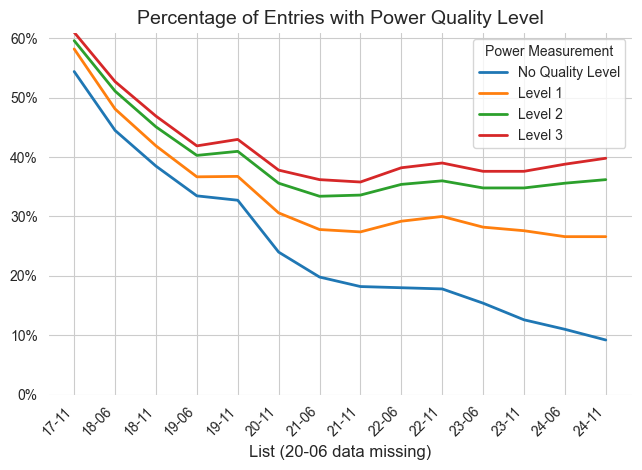

In [14]:
# Calculate the cumulative sums for the second DataFrame across Power Quality Levels
cumulative_sums = normalized_pivot_uf[column_order].cumsum(axis=1)
ax = cumulative_sums.plot(kind='line', linewidth=2)
# set limit y axis to start at 0 going to current limit
ax.set_ylim(0, cumulative_sums.max().max())
    
# ensure that each x tick is shown
ax.set_xticks(range(len(cumulative_sums.index)))
# ensure that each x label i sshown
ax.set_xticklabels(cumulative_sums.index, rotation=45, ha="right", fontsize=10)

plt.xlabel('List (20-06 data missing)', fontsize=12)
plt.title('Percentage of Entries with Power Quality Level', fontsize=14)
plt.tight_layout()

# Formatting the y-axis labels to show percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x)))

# Make background transparent
ax.set_facecolor('none')
plt.gca().patch.set_alpha(0)

# Change color of all spines (borders of the plot)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Change grid color to white
# ax.grid(color='white')

# Save the figure
plt.savefig('green500-level.png', dpi=300, transparent=True)  # High resolution for clarity

# Show the plot
plt.show()

/tmp/ipykernel_12875/831273537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest["Power Measurement"] = latest["PQL"].map(mm)


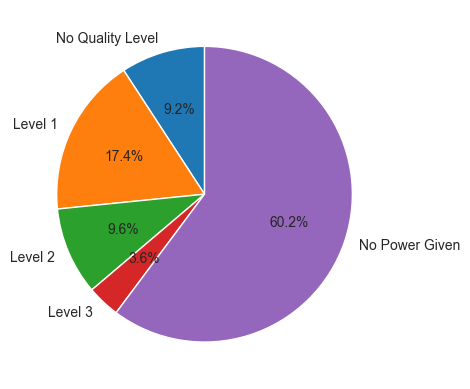

In [16]:
# Barchart of the latest values
latest = dfs_unfiltered[dfs_unfiltered.list == "2024-11-01"]
latest["Power Measurement"] = latest["PQL"].map(mm)
latest = latest["Power Measurement"].value_counts()
latest = latest[column_order_ext]
#piechart
fig, ax = plt.subplots()
ax.pie(latest, labels=latest.index, autopct='%1.1f%%', startangle=90)

# Save the figure
plt.savefig('green500-pie.png', dpi=300, transparent=True)  # High resolution for clarity



In [70]:
3.2+9+15.6+11+61.2

100.0